In [10]:
import pandas as pd
import requests
import json
from config import key
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook, ticker, units
import datetime
import functools
import logging
import math
import re

## US Census Data API

In [11]:
census = pd.read_html('https://api.census.gov/data.html')[0]

In [12]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    574 non-null    object
 1   Description              574 non-null    object
 2   Vintage                  518 non-null    object
 3   Dataset Name             574 non-null    object
 4   Dataset Type             518 non-null    object
 5   Geography List           574 non-null    object
 6   Variable List            574 non-null    object
 7   Group List               574 non-null    object
 8   Examples                 574 non-null    object
 9   Developer Documentation  574 non-null    object
 10  API Base URL             573 non-null    object
dtypes: object(11)
memory usage: 49.5+ KB


In [13]:
list(census["Title"])

['1986 County Business Patterns: Business Patterns',
 '1987 County Business Patterns: Business Patterns',
 '1988 County Business Patterns: Business Patterns',
 '1989 County Business Patterns: Business Patterns',
 '1990 County Business Patterns: Business Patterns',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: County Estimates by 5 Year Age Groups, Race by Sex, and Hispanic Origin',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Civilian Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident plus Armed Forces Overseas Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident Population Estimates by Age and Sex',
 '1991 County Business Patterns: Business Patterns',
 '1992 County Business Patterns: Business Patterns',
 '1993 County Business Patterns: Business Patterns',
 '1994 County Business Patterns: Busines

### International Trade

In [14]:
trade_census = census[census["Title"].str.contains("International Trade")]
pd.set_option('display.max_colwidth', None)
trade_census

,Title,Description,Vintage,Dataset Name,Dataset Type,Geography List,Variable List,Group List,Examples,Developer Documentation,API Base URL
306,2014 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2014,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2014/intltrade/imp_exp
352,2015 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2015,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2015/intltrade/imp_exp
378,2016 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2016,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2016/intltrade/imp_exp
452,2017 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2017,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2017/intltrade/imp_exp
483,2018 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2018,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2018/intltrade/imp_exp
527,Time Series Economic Indicators Time Series -: U.S. International Trade in Goods and Services,"The U.S. Census Bureau.s economic indicator surveys provide monthly and quarterly data that are timely, reliable, and offer comprehensive measures of the U.S. economy. These surveys produce a variety of statistics covering construction, housing, international trade, retail trade, wholesale trade, services and manufacturing. The survey data provide measures of 

### Time Series International Trade: Monthly U.S. Imports by End-use Code <br>
The Census data API provides access to the most comprehensive set of data on current month and cumulative year-to-date imports using the End-use classification system. The End-use endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the district level for all U.S. trading partners.

#### Variables

In [15]:
import_var = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/enduse/variables.html')[0]
print(list(import_var['Name']))

['AIR_CHA_MO', 'AIR_CHA_YR', 'AIR_VAL_MO', 'AIR_VAL_YR', 'AIR_WGT_MO', 'AIR_WGT_YR', 'CAL_DUT_MO', 'CAL_DUT_YR', 'CC_MO', 'CC_YR', 'CNT_CHA_MO', 'CNT_CHA_YR', 'CNT_VAL_MO', 'CNT_VAL_YR', 'CNT_WGT_MO', 'CNT_WGT_YR', 'COMM_LVL', 'CON_CHA_MO', 'CON_CHA_YR', 'CON_CIF_MO', 'CON_CIF_YR', 'CON_VAL_MO', 'CON_VAL_YR', 'CTY_CODE', 'CTY_NAME', 'DIST_NAME', 'DISTRICT', 'DUT_VAL_MO', 'DUT_VAL_YR', 'GEN_CHA_MO', 'GEN_CHA_YR', 'GEN_CIF_MO', 'GEN_CIF_YR', 'GEN_VAL_MO', 'GEN_VAL_YR', 'I_ENDUSE', 'I_ENDUSE_LDESC', 'I_ENDUSE_SDESC', 'LAST_UPDATE', 'MONTH', 'SUMMARY_LVL', 'SUMMARY_LVL2', 'time', 'VES_CHA_MO', 'VES_CHA_YR', 'VES_VAL_MO', 'VES_VAL_YR', 'VES_WGT_MO', 'VES_WGT_YR', 'YEAR', '50 variables']


In [16]:
var_dict = dict(zip(import_var["Name"], import_var["Label"].str.replace('15-digit ', '')))

#### Data

In [17]:
url = 'https://api.census.gov/data/timeseries/intltrade/imports/enduse?get='

In [20]:
Mresponse = requests.get(f"{url}I_ENDUSE,I_ENDUSE_LDESC,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_CHA_MO,CNT_VAL_MO,CNT_WGT_MO,CON_VAL_MO,VES_CHA_MO,VES_VAL_MO,VES_WGT_MO&time=from+2019+to+2021&key={key}")
print(Mresponse.url)

https://api.census.gov/data/timeseries/intltrade/imports/enduse?get=I_ENDUSE,I_ENDUSE_LDESC,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_CHA_MO,CNT_VAL_MO,CNT_WGT_MO,CON_VAL_MO,VES_CHA_MO,VES_VAL_MO,VES_WGT_MO&time=from+2019+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [21]:
Yresponse = requests.get(f"{url}I_ENDUSE,I_ENDUSE_LDESC,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_CHA_YR,CNT_VAL_YR,CNT_WGT_YR,CON_VAL_YR,VES_CHA_YR,VES_VAL_YR,VES_WGT_YR&time=from+2010+to+2021&key={key}")
print(Yresponse.url)

https://api.census.gov/data/timeseries/intltrade/imports/enduse?get=I_ENDUSE,I_ENDUSE_LDESC,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_CHA_YR,CNT_VAL_YR,CNT_WGT_YR,CON_VAL_YR,VES_CHA_YR,VES_VAL_YR,VES_WGT_YR&time=from+2010+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [23]:
Mdf = Mresponse.json()
Mdf = pd.DataFrame(Mdf, columns=Mdf[0]).drop([0]).rename(columns=var_dict)
Mdf.head()

,1- or 5-character Import ENDUSE Code,100-character Import ENDUSE Long Description,100-character Import ENDUSE Short Description,2-character District Code,50-character District name,Containerized Vessel Charges,Containerized Vessel Value,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",Vessel Charges,Vessel Value,Vessel Shipping Weight,ISO-8601 Date/Time value
1,0,"FOODS, FEEDS, AND BEVERAGES","FOODS, FEEDS, AND BEVERAGES",-,TOTAL FOR ALL DISTRICTS,385844412,7038612984,3210564497,12644009005,433976809,7616950205,6043367598,2019-01
2,00000,GREEN COFFEE,GREEN COFFEE,-,TOTAL FOR ALL DISTRICTS,10020477,379743478,133696955,389845724,10025226,379829963,133723877,2019-01
3,00010,COCOA BEANS,COCOA BEANS,-,TOTAL FOR ALL DISTRICTS,2274363,64512445,30900280,108660535,3396864,108591660,59013426,2019-01
4,00020,CANE AND BEET SUGAR,CANE AND BEET SUGAR,-,TOTAL FOR ALL DISTRICTS,2900088,31228982,41121466,146421769,5296858,119838809,227550620,2019-01
5,00100,MEAT PRODUCTS,MEAT PRODUCTS,-,TOTAL FOR ALL DISTRICTS,12021747,468177650,86651090,982015051,12047005,469307885,86739359,2019-01


In [24]:
Ydf = Yresponse.json()
Ydf = pd.DataFrame(Ydf, columns=Ydf[0]).drop([0]).rename(columns=var_dict)
Ydf.head()

,1- or 5-character Import ENDUSE Code,100-character Import ENDUSE Long Description,100-character Import ENDUSE Short Description,2-character District Code,50-character District name,Year-to-Date Containerized Vessel Charges,Year-to-Date Containerized Vessel Value,Year-to-Date Containerized Vessel Shipping Weight,"Year-to-Date Imports for Consumption, Total Value",Year-to-Date Vessel Charges,Year-to-Date Vessel Value,Year-to-Date Vessel Shipping Weight,ISO-8601 Date/Time value
1,21190,"PHOTO, SERVICE INDUSTRY MACHINERY","PHOTO, SERVICE INDUSTRY MACHINERY",51,U.S. VIRGIN ISLANDS,0,0,0,2273,0,0,0,2013-01
2,21190,"PHOTO, SERVICE INDUSTRY MACHINERY","PHOTO, SERVICE INDUSTRY MACHINERY",52,"MIAMI, FL",703586,14823069,1941091,17011411,775022,20775620,2768039,2013-01
3,21190,"PHOTO, SERVICE INDUSTRY MACHINERY","PHOTO, SERVICE INDUSTRY MACHINERY",53,"HOUSTON-GALVESTON, TX",1097826,23146420,4205574,25113267,1116002,23708186,4244354,2013-01
4,21190,"PHOTO, SERVICE INDUSTRY MACHINERY","PHOTO, SERVICE INDUSTRY MACHINERY",54,"WASHINGTON, DC",6567,153959,45949,1005965,6567,153959,45949,2013-01
5,21190,"PHOTO, SERVICE INDUSTRY MACHINERY","PHOTO, SERVICE INDUSTRY MACHINERY",55,"DALLAS-FORT WORTH, TX",1197922,17109572,3574388,32753772,1221633,17704069,3642010,2013-01


In [87]:
Mvessel = Mdf[~Mdf['100-character Import ENDUSE Long Description'].str.contains("TOTAL")].drop(columns=['1- or 5-character Import ENDUSE Code','100-character Import ENDUSE Long Description','2-character District Code']).rename(columns={'100-character Import ENDUSE Short Description':'Product', '50-character District name': 'District', 'ISO-8601 Date/Time value':'Date'}).set_index('Date')
Mvessel.head()

,Product,District,Containerized Vessel Charges,Containerized Vessel Value,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",Vessel Charges,Vessel Value,Vessel Shipping Weight
Date,,,,,,,,,
2019-01,"FOODS, FEEDS, AND BEVERAGES",TOTAL FOR ALL DISTRICTS,385844412,7038612984,3210564497,12644009005,433976809,7616950205,6043367598
2019-01,GREEN COFFEE,TOTAL FOR ALL DISTRICTS,10020477,379743478,133696955,389845724,10025226,379829963,133723877
2019-01,COCOA BEANS,TOTAL FOR ALL DISTRICTS,2274363,64512445,30900280,108660535,3396864,108591660,59013426
2019-01,CANE AND BEET SUGAR,TOTAL FOR ALL DISTRICTS,2900088,31228982,41121466,146421769,5296858,119838809,227550620
2019-01,MEAT PRODUCTS,TOTAL FOR ALL DISTRICTS,12021747,468177650,86651090,982015051,12047005,469307885,86739359


In [56]:
Yvessel = Ydf[~Ydf['100-character Import ENDUSE Long Description'].str.contains("TOTAL")].drop(columns=['1- or 5-character Import ENDUSE Code','100-character Import ENDUSE Long Description','2-character District Code']).rename(columns={'100-character Import ENDUSE Short Description':'Product', '50-character District name': 'District', 'ISO-8601 Date/Time value':'Date'})
Yvessel.head()

,Product,District,Year-to-Date Containerized Vessel Charges,Year-to-Date Containerized Vessel Value,Year-to-Date Containerized Vessel Shipping Weight,"Year-to-Date Imports for Consumption, Total Value",Year-to-Date Vessel Charges,Year-to-Date Vessel Value,Year-to-Date Vessel Shipping Weight,Date
1,"PHOTO, SERVICE INDUSTRY MACHINERY",U.S. VIRGIN ISLANDS,0,0,0,2273,0,0,0,2013-01
2,"PHOTO, SERVICE INDUSTRY MACHINERY","MIAMI, FL",703586,14823069,1941091,17011411,775022,20775620,2768039,2013-01
3,"PHOTO, SERVICE INDUSTRY MACHINERY","HOUSTON-GALVESTON, TX",1097826,23146420,4205574,25113267,1116002,23708186,4244354,2013-01
4,"PHOTO, SERVICE INDUSTRY MACHINERY","WASHINGTON, DC",6567,153959,45949,1005965,6567,153959,45949,2013-01
5,"PHOTO, SERVICE INDUSTRY MACHINERY","DALLAS-FORT WORTH, TX",1197922,17109572,3574388,32753772,1221633,17704069,3642010,2013-01


In [88]:
Mvessel.describe()

,Product,District,Containerized Vessel Charges,Containerized Vessel Value,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",Vessel Charges,Vessel Value,Vessel Shipping Weight
count,146059,146059,146059,146059,146059,146059,146059,146059,146059
unique,148,45,81681,98631,91965,135366,84998,102185,95323
top,OTHER GOODS,TOTAL FOR ALL DISTRICTS,0,0,0,0,0,0,0
freq,1166,3848,44701,44496,44563,8037,41104,40904,40965


In [89]:
Mvessel.dtypes

Product                                 object
District                                object
Containerized Vessel Charges            object
Containerized Vessel Value              object
Containerized Vessel Shipping Weight    object
Imports for Consumption, Total Value    object
Vessel Charges                          object
Vessel Value                            object
Vessel Shipping Weight                  object
dtype: object

In [92]:
Mvessel['Product'] = Mvessel['Product'].astype('object')
Mvessel['District'] = Mvessel['District'].astype('object')
Mvessel['Containerized Vessel Charges'] = Mvessel['Containerized Vessel Charges'].astype('float')
Mvessel['Containerized Vessel Value'] = Mvessel['Containerized Vessel Value'].astype('float')
Mvessel['Containerized Vessel Shipping Weight'] = Mvessel['Containerized Vessel Shipping Weight'].astype('float')
Mvessel['Imports for Consumption, Total Value'] = Mvessel['Imports for Consumption, Total Value'].astype('float')
Mvessel['Vessel Charges'] = Mvessel['Vessel Charges'].astype('float')
Mvessel['Vessel Value'] = Mvessel['Vessel Value'].astype('float')
Mvessel['Vessel Shipping Weight'] = Mvessel['Vessel Shipping Weight'].astype('float')

In [96]:
Mvessel.describe()

,Containerized Vessel Charges,Containerized Vessel Value,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",Vessel Charges,Vessel Value,Vessel Shipping Weight
count,1.460590e+05,1.460590e+05,1.460590e+05,1.460590e+05,1.460590e+05,1.460590e+05,1.460590e+05
mean,2.137539e+06,4.673077e+07,1.055351e+07,1.434010e+08,2.684361e+06,6.267694e+07,3.388808e+07
std,2.353106e+07,4.920345e+08,1.098001e+08,1.371669e+09,2.817543e+07,6.223669e+08,5.401210e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,4.833280e+05,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+04,4.907140e+05,8.391200e+04,5.025194e+06,2.728200e+04,7.199870e+05,1.179880e+05
75%,3.560095e+05,8.079822e+06,1.691718e+06,3.091630e+07,4.724715e+05,1.080079e+07,2.484668e+06
max,1.765649e+09,3.177439e+10,5.872526e+09,6.625266e+10,1.782869e+09,3.227049e+10,4.301701e+10


In [101]:
Product = Mvessel.groupby('District').mean()
Product

,Containerized Vessel Charges,Containerized Vessel Value,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",Vessel Charges,Vessel Value,Vessel Shipping Weight
District,,,,,,,
"ANCHORAGE, AK",2.549347e+03,2.936247e+04,4.724318e+04,1.999959e+07,4.920115e+04,1.119385e+06,2.454598e+06
"BALTIMORE, MD",1.047908e+06,2.416650e+07,6.606422e+06,4.977483e+07,1.598290e+06,4.885226e+07,1.497629e+07
"BOSTON, MA",3.149611e+05,6.890534e+06,1.576203e+06,2.587067e+07,5.209603e+05,1.337559e+07,1.341733e+07
"BUFFALO, NY",2.290708e+04,3.987594e+05,9.760094e+04,4.284966e+07,2.877568e+04,6.808027e+05,8.133789e+05
"CHARLESTON, SC",1.710995e+06,4.815968e+07,9.355416e+06,5.557369e+07,1.839692e+06,5.113639e+07,1.464136e+07
"CHICAGO, IL",2.208061e+06,4.520570e+07,8.251187e+06,2.514361e+08,2.280494e+06,4.669072e+07,1.092728e+07
"CLEVELAND, OH",1.332511e+06,3.235219e+07,4.832808e+06,1.214718e+08,1.396690e+06,3.429372e+07,9.099655e+06
"COLUMBIA-SNAKE, OR",1.435096e+05,3.090977e+06,8.691383e+05,1.589540e+07,4.416435e+05,1.393417e+07,6.402648e+06
"DALLAS-FORT WORTH, TX",1.028956e+06,1.584950e+07,3.103937e+06,5.931663e+07,1.041820e+06,1.620757e+07,3.139908e+06


In [85]:
Mvessel.plot.area(stacked=False, figsize=(14,7))

TypeError: Invalid comparison between dtype=datetime64[ns] and int

OverflowError: int too big to convert

In [43]:
# subjects
Scontainer = ['Containerized Vessel Charges', 'Containerized Vessel Value', 'Containerized Vessel Shipping Weight']
Sconsumption = ['Imports for Consumption, Charges', 'Imports for Consumption, Total Value']
Svessel = ['Vessel Charges', 'Vessel Value', 'Vessel Shipping Weight']

<AxesSubplot:xlabel='Date'>

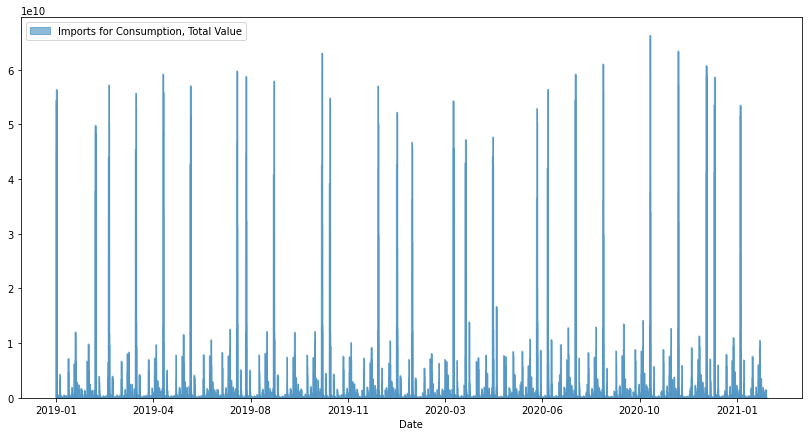

In [44]:
ProductConsumption = Mvessel.drop(columns=Scontainer).drop(columns=Svessel)

ProductConsumption.plot.area(stacked=False, figsize=(14,7))

In [ ]:
ProductConsumption.plot.bar()

### Time Series International Trade: Monthly U.S. Imports by Port and Harmonized System (HS) Code
The Port HS endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the port level for all U.S. trading partners.

#### Variable

In [ ]:
port_var = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/porths/variables.html')[0]
print(list(port_var['Name']))

In [ ]:
var_dict2 = dict(zip(port_var["Name"], port_var["Label"].str.replace('15-digit ', '')))

#### Data

In [ ]:
url2 = ("https://api.census.gov/data/timeseries/intltrade/imports/porths?get=")

In [ ]:
response2 = requests.get(f"{url2}PORT,PORT_NAME,CNT_VAL_MO,CNT_WGT_MO,CTY_CODE,CTY_NAME,GEN_VAL_MO,VES_VAL_MO,VES_WGT_MO&time=2021&key={key}")
print(response2.url)

In [ ]:
df2 = response2.json()
df2 = pd.DataFrame(df2, columns=df2[0]).drop([0]).rename(columns=var_dict2)
df2.head()

In [ ]:
remove = df2[~df2["150-character Port Name"].str.contains("TOTAL")].drop(columns=['4-character Port Code','4-character Country Code'])
port = remove[~remove["50-character Country Name"].str.contains("TOTAL")].rename(columns={'150-character Port Name':'Port', '50-character District name': 'District', 'ISO-8601 Date/Time value':'Date'})
port.set_index('Port').head()